## 使用自己的逻辑回归并且探求逻辑回归的决策边界

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import sys

sys.path.append('../')

In [2]:
from playMachine.LogisticRegression import LogisticRegression

In [3]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

In [4]:
X = X[y<2,:2]
y = y[y<2]
X.shape

(100, 2)

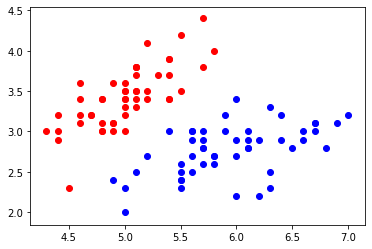

In [5]:
plt.scatter(X[y==0,0],X[y==0,1],color='r')
plt.scatter(X[y==1,0],X[y==1,1],color='b')

In [6]:
from playMachine.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,seed=666)

In [7]:
log_reg=LogisticRegression()

In [49]:
%time log_reg.fit(X_train,y_train)

../playMachine/LogisticRegression.py:21: RuntimeWarning: invalid value encountered in log
  y_hat = self._sigmoid(X_b*np.log(theta))
../playMachine/LogisticRegression.py:21: RuntimeWarning: divide by zero encountered in log
  y_hat = self._sigmoid(X_b*np.log(theta))
../playMachine/LogisticRegression.py:23: RuntimeWarning: divide by zero encountered in log
  return -np.sum(y*np.log(y_hat)+(1-y)*log(1-y_hat))/len(y)


CPU times: user 414 ms, sys: 16 ms, total: 430 ms
Wall time: 421 ms


LogisticRegression()

In [9]:
log_reg.score(X_test,y_test)

1.0

In [10]:
log_reg.predict_proba(X_test)

array([0.92972035, 0.98664939, 0.14852024, 0.01685947, 0.0369836 ,
       0.0186637 , 0.04936918, 0.99669244, 0.97993941, 0.74524655,
       0.04473194, 0.00339285, 0.26131273, 0.0369836 , 0.84192923,
       0.79892262, 0.82890209, 0.32358166, 0.06535323, 0.20735334])

In [11]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [12]:
log_reg.predict(X_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [13]:
log_reg.coef_

array([ 3.01796521, -5.04447145])

In [14]:
log_reg.intercept_

-0.6937719272911225

In [50]:
%time log_reg.fit_sgd(X_train,y_train,n_iters=10)

CPU times: user 8.47 ms, sys: 8.04 ms, total: 16.5 ms
Wall time: 10.6 ms


LogisticRegression()

In [51]:
log_reg.coef_

array([ 1.44508593, -2.31716846])

In [52]:
log_reg.predict(X_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [53]:
log_reg.score(X_test,y_test)

1.0

## 决策边界

$$\theta^T\cdot{X_b}=0$$
如果X有两个特征，那么有决策边界$\theta_0+\theta_1x_1+\theta_2x_2=0$
$$x_2 = \frac{-\theta_0-\theta_1x_1}{\theta_2}$$

In [16]:
def x2(x1):
    return (-log_reg.coef_[0]*x1-log_reg.intercept_)/log_reg.coef_[1]

In [17]:
x1_plot = np.linspace(4,8,1000)
x2_plot = x2(x1_plot)

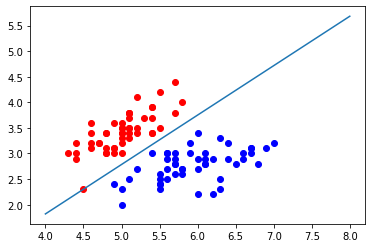

In [18]:
plt.scatter(X[y==0,0],X[y==0,1],color='r')
plt.scatter(X[y==1,0],X[y==1,1],color='b')
plt.plot(x1_plot,x2_plot)

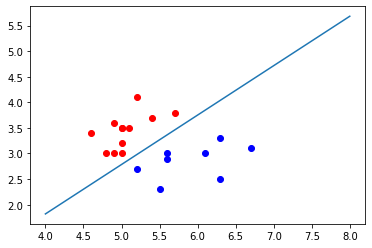

In [19]:
plt.scatter(X_test[y_test==0,0],X_test[y_test==0,1],color='r')
plt.scatter(X_test[y_test==1,0],X_test[y_test==1,1],color='b')
plt.plot(x1_plot,x2_plot)

### 不规则决策边界的绘制方法

In [20]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, alpha=0.75, cmap=custom_cmap)

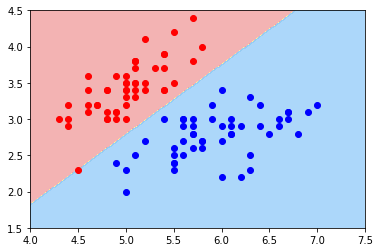

In [21]:
plot_decision_boundary(log_reg, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0],X[y==0,1],color='r')
plt.scatter(X[y==1,0],X[y==1,1],color='b')

### 回过头看kNN的决策边界

In [22]:
from playMachine.kNN import KNNClassifier

knn_clf = KNNClassifier(5)
knn_clf.fit(X_train,y_train)

KNN(k=5)

In [23]:
knn_clf.score(X_test,y_test)

1.0

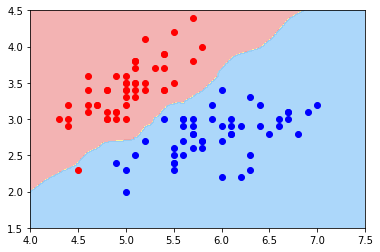

In [24]:
plot_decision_boundary(knn_clf, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0],X[y==0,1],color='r')
plt.scatter(X[y==1,0],X[y==1,1],color='b')

In [25]:
knn_clf_all = KNNClassifier(5)
knn_clf_all.fit(iris.data[:,:2],iris.target)

KNN(k=5)

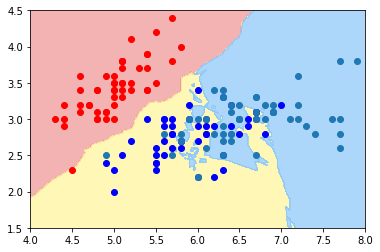

In [26]:
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1], color='r')
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1], color='b')
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])

In [27]:
knn_clf_all = KNNClassifier(50)
knn_clf_all.fit(iris.data[:,:2],iris.target)

KNN(k=50)

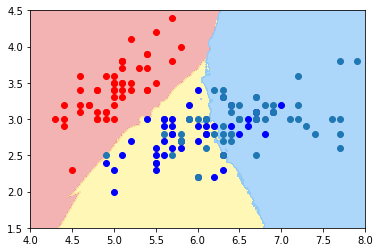

In [28]:
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1], color='r')
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1], color='b')
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])

In [29]:
knn_clf_all.score(X_test,y_test)

0.9